In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\files\\Documents\\polyu\\courses\\urban_big_data\\final_project\\train.csv')

data['Dates'] = pd.to_datetime(data['Dates'])
me
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data['Day'] = data['Dates'].dt.day


In [3]:
label_encoders = {}
for column in ['DayOfWeek', 'PdDistrict', 'Address']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [4]:
X = data[['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Year', 'Month', 'Day']]
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1104)

In [5]:
n_estimators_values = [300]

accuracy_scores = []
roc_auc_scores = []

for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n, random_state=1104)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)


print(accuracy_scores)
print(roc_auc_scores)


[0.297055976311144]
[np.float64(0.6424516659442677)]


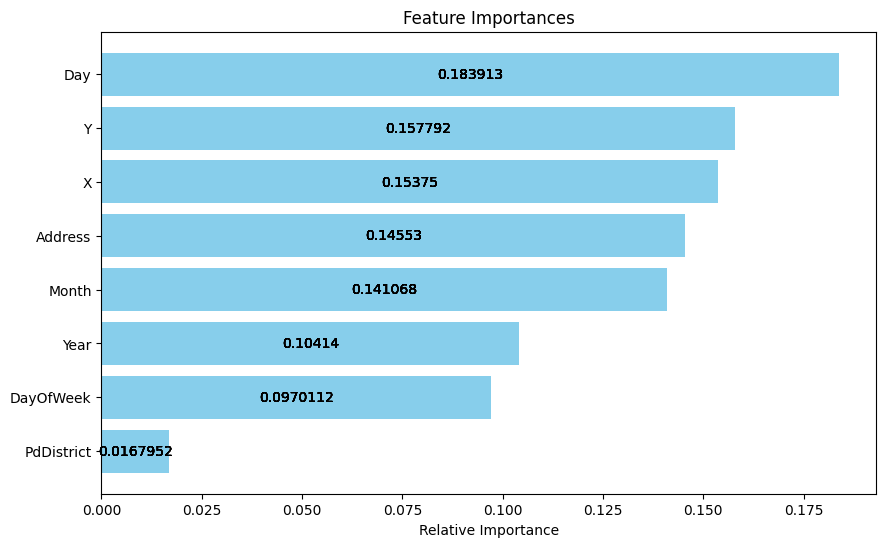

In [9]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
indices = np.argsort(importances)
plt.title('Feature Importances')
barh = plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
for b in barh:
    plt.bar_label(barh, label_type='center')

plt.show()